- 지도학습 : 학습 데이터에 각각에 정답이 주어져 있음
- 회귀 : 연속된 값으로 예측
- cost function을 가장 작은 값을 가질 수 있게 만드는 theta가 정답이다 (최소가 되는)
- 회귀 문제 -> 얼마나 틀렸느냐 / 맞았냐가 존재함 RMSE

- 특성의 존재 여부 -> 논리적으로 검토 필요함

In [1]:
import numpy as np 

np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2

poly1d([ 38, -94,  62])

In [2]:
import sympy as sym 

th = sym.Symbol('th')
diff_th = sym.diff(38*th**2 - 94*th + 62, th)
diff_th

76*th - 94

### 보스톤 집 가격 데이터

- \s+ is a regular expression for one or more spaces.
- delimiter = "\s+"는 CSV 파일 내의 값들이 공백 또는 탭과 같은 공백 문자로 구분되어 있다는 것을 의미합니다. 
- 이는 파일 내의 값들이 표준 쉼표 ,가 아닌 공백 문자로 구분되어 있는 경우에 유용합니다

In [3]:
from pandas import read_csv

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                'PTRATIO', 'B', 'LSTAT', 'PRICE']

boston_pd = read_csv('/home/dev_ws/ML/data/housing.csv', header=None, delimiter = "\s+", names = column_names)
boston_pd

/tmp/ipykernel_22428/482698586.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  from pandas import read_csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### price에 대한 histogram

In [4]:
import plotly.express as px 

fig = px.histogram(boston_pd, x = "PRICE")
fig.show()

### 각 특성별 상관계수 확인

<Axes: >

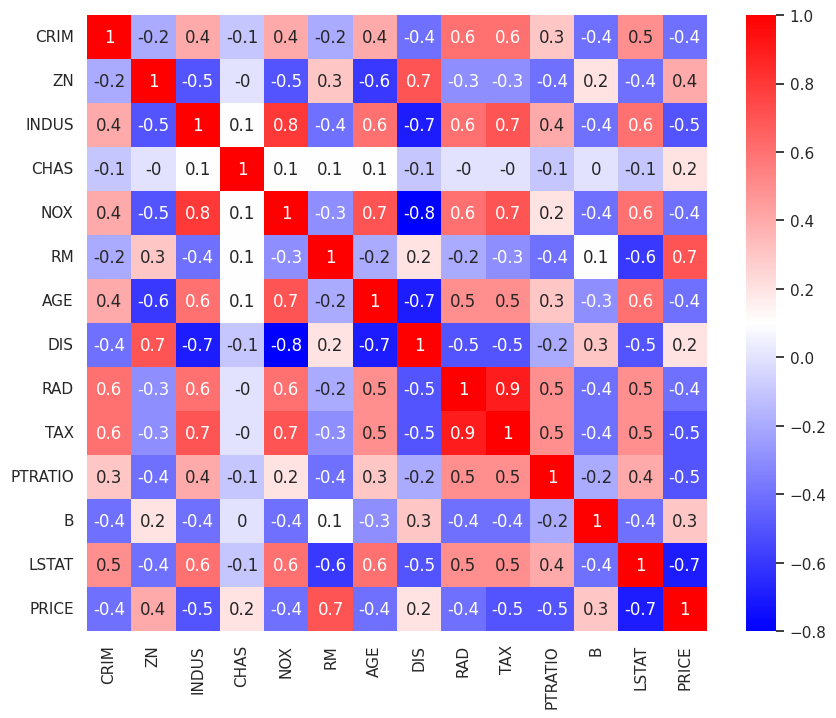

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

corr_mat = boston_pd.corr().round(1)
sns.set(rc = {'figure.figsize' : (10,8)})
sns.heatmap(data = corr_mat, annot = True, cmap = 'bwr')

### RM과 LSTAT와 PRICE의 관계 확인

<Axes: xlabel='LSTAT', ylabel='PRICE'>

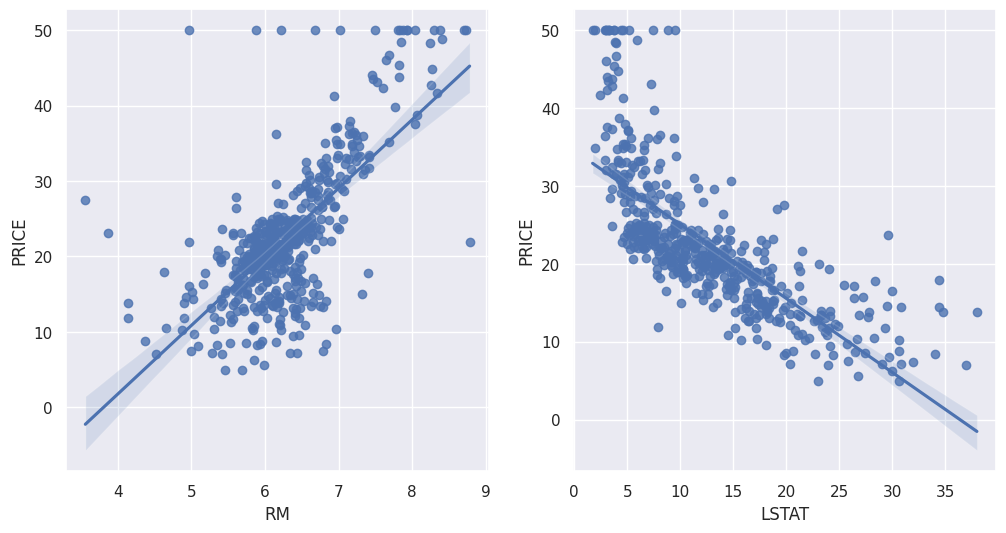

In [6]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize' : (12,6)})
fig , ax = plt.subplots(ncols = 2)
sns.regplot(x = 'RM', y = 'PRICE', data = boston_pd, ax = ax[0])
sns.regplot(x = 'LSTAT', y = 'PRICE', data = boston_pd, ax = ax[1])

### 데이터 나누기

In [7]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2,
                                                       random_state=13)


### 선형회귀 모델 사용

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### 모델 평가 : RMS

In [9]:
import numpy as np 
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Date : ', rmse_tr)
print('RMSE Of Test Data : ', rmse_test)

RMSE of Train Date :  4.642806069019824
RMSE Of Test Data :  4.931352584146711


### 성능 확인

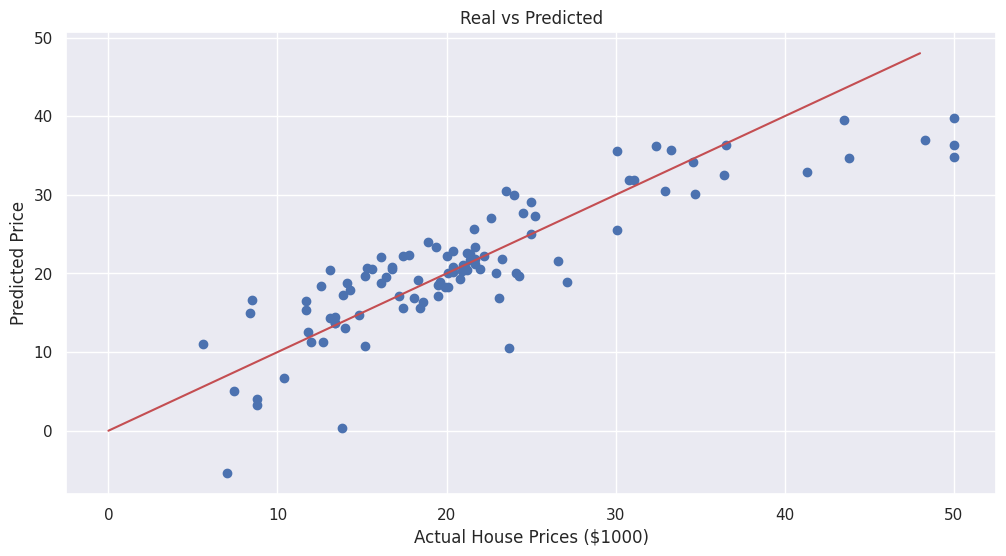

In [10]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Price")
plt.title("Real vs Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()

### LSTAT를 사용하는 것이 맞을까?

In [11]:
X = boston_pd.drop(['PRICE', 'LSTAT'], axis = 1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  5.165137874244864
RMSE of Test Data :  5.295595032597155


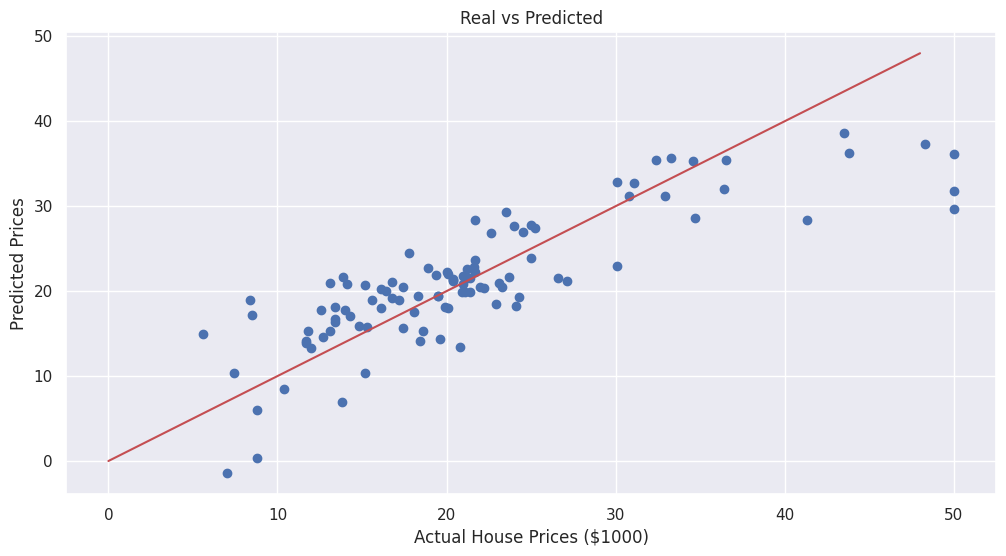

In [13]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()